In [69]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [70]:
df=pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [71]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       714 non-null    float64
 2   Fare      891 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 21.0 KB


In [73]:
df.dropna(inplace=True)

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

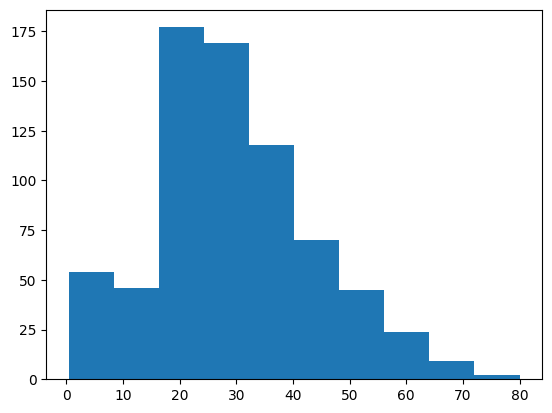

In [74]:
plt.hist(df['Age'])

(array([577.,  89.,  28.,   2.,   9.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

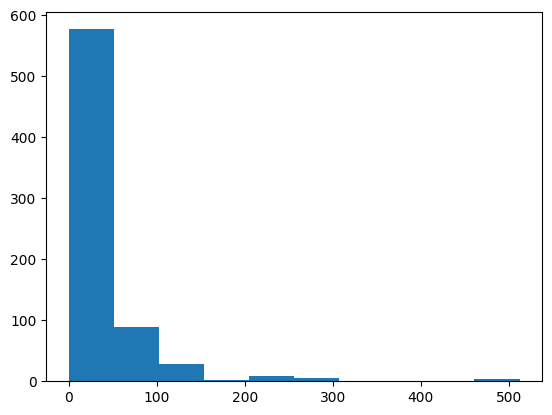

In [75]:
plt.hist(df['Fare'])

In [76]:
x_train,x_test,y_train,y_test=train_test_split(df.iloc[:,1:3],df.iloc[:, 0])

In [77]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(535, 2)
(179, 2)
(535,)
(179,)


# model without binarization

In [78]:
clf1=LogisticRegression()
clf1.fit(x_train,y_train)
y_pred1=clf1.predict(x_test)

In [79]:
print(accuracy_score(y_test,y_pred1))

0.6871508379888268


In [80]:
# cross val score 
np.mean(cross_val_score(clf1,df.iloc[:,1:3],df.iloc[:,0],cv=10,scoring='accuracy'))

0.6554577464788732

# Model with Binarization

In [81]:
bin1=KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
bin2=KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')

we apply ColumnTransformer for transform our data because there is multiple columns which we have to transform 

In [82]:
ColumnTransformer([
    ('bin_age',bin1,[1]),
    ('bin_Fare',bin2,[2])
])

ColumnTransformer(transformers=[('bin_age',
                                 KBinsDiscretizer(encode='ordinal', n_bins=15),
                                 [1]),
                                ('bin_Fare',
                                 KBinsDiscretizer(encode='ordinal', n_bins=15),
                                 [2])])

In [83]:
trf=ColumnTransformer([
    ('bin_age',bin1,[0]),
    ('bin_Fare',bin2,[1])
])

In [84]:
x_train_trf=trf.fit_transform(x_train)
x_test_trf=trf.fit_transform(x_test)

In [85]:
clf2=LogisticRegression()
clf2.fit(x_train_trf,y_train)
y_pred2=clf2.predict(x_test_trf)

In [86]:
accuracy_score(y_pred2,y_test)

0.664804469273743

In [87]:
np.mean(cross_val_score(clf2,df.iloc[:,1:3],df.iloc[: ,0],cv=10,scoring='accuracy'))

0.6554577464788732

Text(0.5, 1.0, 'after Binarization')

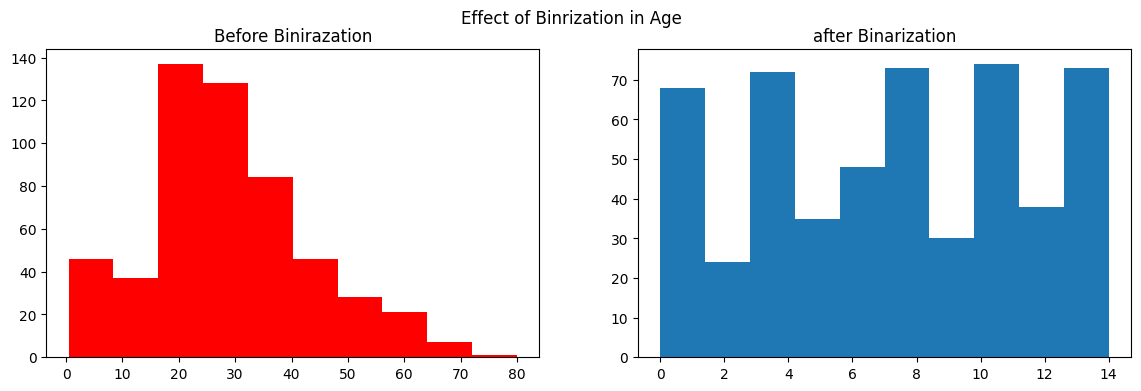

In [88]:
plt.figure(figsize=(14,4))
plt.suptitle('Effect of Binrization in Age')
plt.subplot(121)
plt.hist(x_train['Age'],color='red')
plt.title('Before Binirazation')
plt.subplot(122)
plt.hist(x_train_trf[:,0])
plt.title('after Binarization')

Text(0.5, 1.0, 'after Binarization')

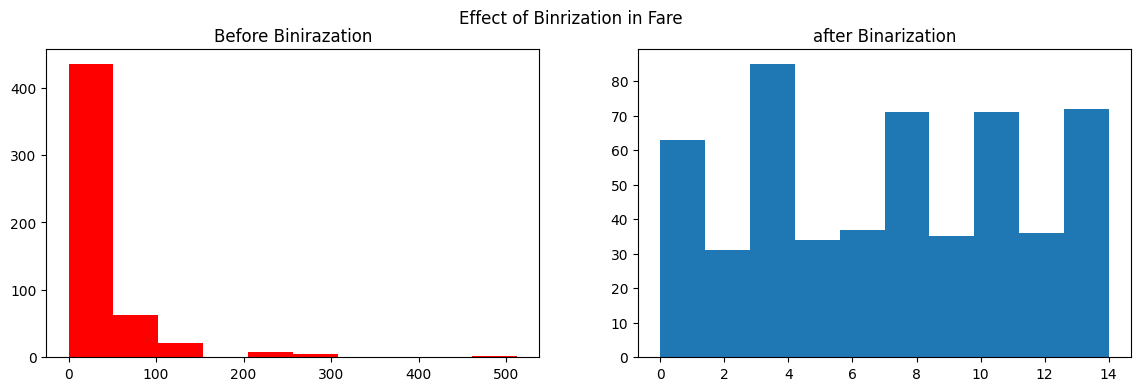

In [89]:
plt.figure(figsize=(14,4))
plt.suptitle('Effect of Binrization in Fare')
plt.subplot(121)
plt.hist(x_train['Fare'],color='red')
plt.title('Before Binirazation')
plt.subplot(122)
plt.hist(x_train_trf[:,1])
plt.title('after Binarization')